## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [144]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [125]:
student_df = pd.read_csv('students-data.csv',delimiter=';')
student_df1=student_df.copy(deep=False)
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [126]:
student_df.index.names=['number']
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [127]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [128]:
student_df_cat=student_df.select_dtypes(exclude=['int64'])

In [129]:
student_df_cat.dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [130]:
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

### removing features which have less variance is available through scikit feature selection technique which is not covered

### looking at above attributes for variances features traveltime,studytime,failures,famrel,freetime and Dalc have variance less than 1 and can be removed manually
### Ideally only features which have variance almost near to 0 have to be removed and there are no features in that category

In [131]:
student_df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [132]:
le = preprocessing.LabelEncoder()

In [133]:
student_df.school = le.fit_transform(student_df.school)
student_df.sex = le.fit_transform(student_df.sex)
student_df.address = le.fit_transform(student_df.address)
student_df.famsize = le.fit_transform(student_df.famsize)
student_df.Pstatus = le.fit_transform(student_df.Pstatus)
student_df.Mjob = le.fit_transform(student_df.Mjob)
student_df.Fjob = le.fit_transform(student_df.Fjob)
student_df.reason = le.fit_transform(student_df.reason)
student_df.guardian = le.fit_transform(student_df.guardian)
student_df.schoolsup = le.fit_transform(student_df.schoolsup)
student_df.famsup = le.fit_transform(student_df.famsup)
student_df.paid = le.fit_transform(student_df.paid)
student_df.activities = le.fit_transform(student_df.activities)
student_df.nursery = le.fit_transform(student_df.nursery)
student_df.higher = le.fit_transform(student_df.higher)
student_df.internet = le.fit_transform(student_df.internet)
student_df.romantic = le.fit_transform(student_df.romantic)


student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [134]:
student_df.Pstatus.value_counts()

1    354
0     41
Name: Pstatus, dtype: int64

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [135]:
student_df['G1']=student_df['G1'].apply(lambda x:1 if x >= 10 else 0)
student_df['G2']=student_df['G2'].apply(lambda x:1 if x >= 10 else 0)
student_df['G3']=student_df['G3'].apply(lambda x:1 if x >= 10 else 0)
#pd.cut(student_df.G1,bins=<=10)
#student_df

In [136]:
student_df.G3.value_counts()

1    265
0    130
Name: G3, dtype: int64

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [137]:
student_df.shape

(395, 27)

In [153]:
X=student_df.drop('G3',axis=1)
y=student_df['G3'].values

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

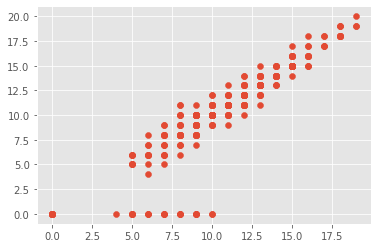

In [140]:
# using orginal dataframe without encoding to understand correlation
plt.scatter(student_df1['G2'],student_df1['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

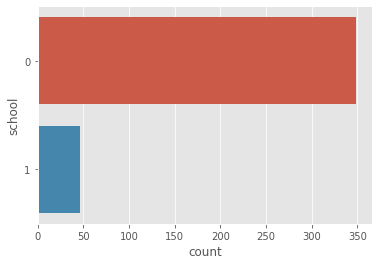

In [141]:
sns.countplot(y='school', data=student_df)

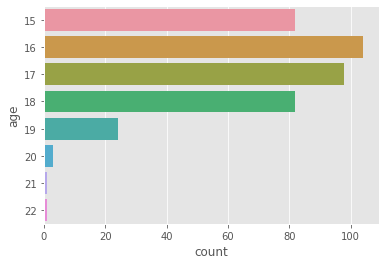

In [142]:
sns.countplot(y='age', data=student_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [156]:
# 300 out of 395 records is 75.94 ~76% which is training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

In [154]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [157]:
X_train.shape, y_train.shape

((300, 26), (300,))

In [158]:
X_test.shape, y_test.shape

((95, 26), (95,))

In [159]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\SivaPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
prediction=model.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9052631578947369

In [172]:
from sklearn.metrics import f1_score
f1_score(y_test,prediction)

0.931297709923664

In [173]:
f1_score(y_test,prediction,average=None)
# f1_score by classes of pass and fail

array([0.84745763, 0.93129771])

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
# 3 FP records and 6 FN records

[[25  3]
 [ 6 61]]


# Naive bayes with Iris data

### Import Iris.csv

In [178]:
Iris_df = pd.read_csv('Iris.csv')
#student_df1=student_df.copy(deep=False)
Iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [179]:
Iris_df.shape

(150, 6)

In [184]:
Iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [213]:
X=Iris_df.drop(['Species','Id'], axis=1)
y=Iris_df['Species']

### Find the distribution of target variable (Class)

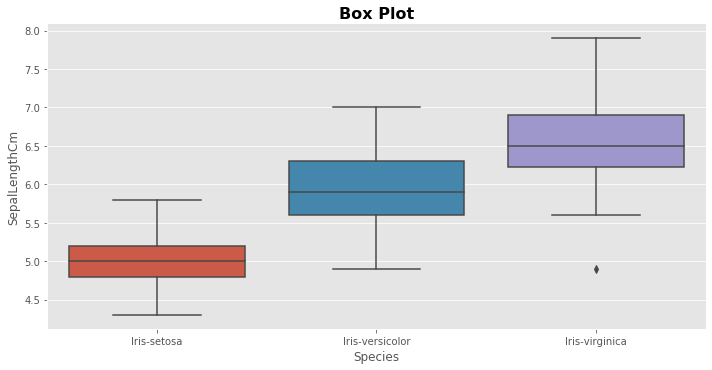

In [245]:
sns.catplot(x='Species', y='SepalLengthCm', data=Iris_df, kind='box', aspect=2)
plt.title('Box Plot', weight='bold', fontsize=16)
plt.show()

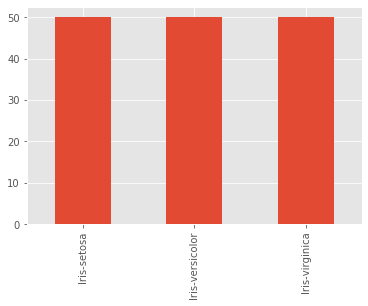

In [192]:
pd.value_counts(Iris_df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

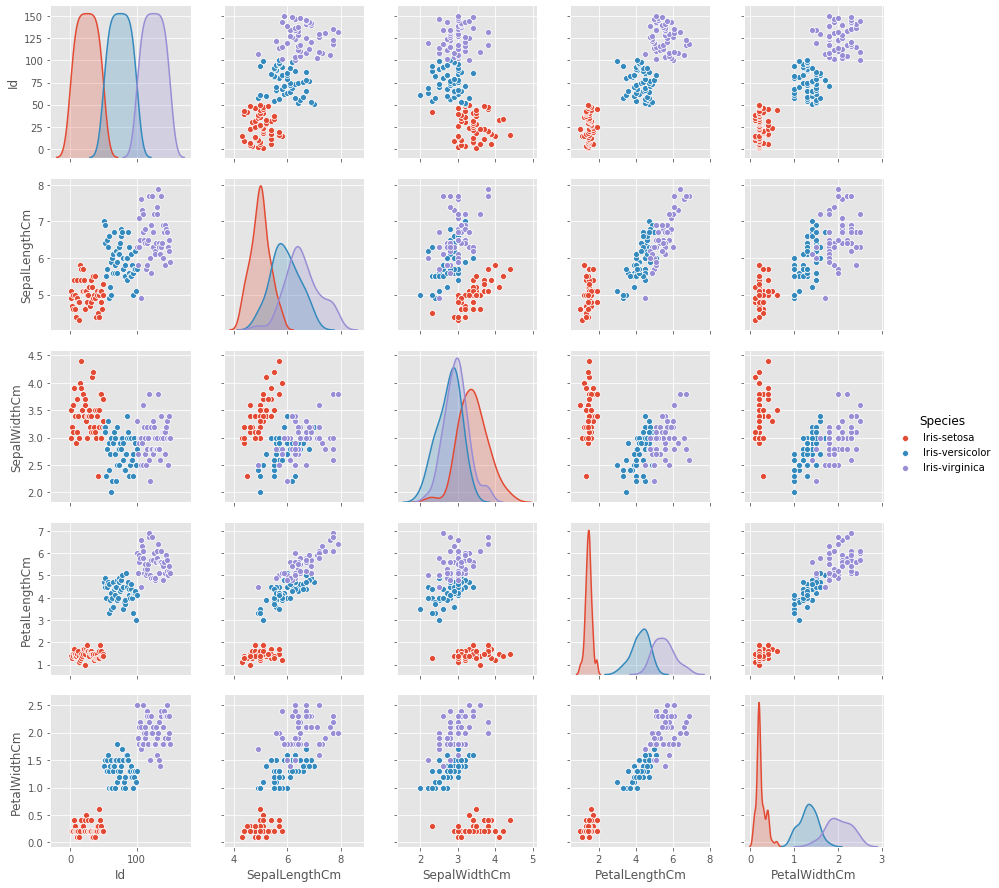

In [198]:
sns.pairplot(Iris_df,hue='Species')

### PetalLengthCm and PetalWidthCm have a strong correlation
### PetalLengthCm and SepalLengthCm have a strong correlation

### Summary Statistics and explain insights for at least 2 variables

In [242]:
Iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Sepal Length and Width are on average high than Petal Length and Width
#### Petal Length has highest range and hence has more standard deviation
#### Exept for SepalWidthCm the other features has higher values for one target class(Iris-setosa) 

### Correlation among all variables and give your insights

##### PetalLengthCm and PetalWidthCm have a strong correlation
##### PetalLengthCm and SepalWidthCm have no correlation and have outliers
##### PetalWidthCm and SepalWidthCm have no correlation and have outliers
##### PetalLengthCm and SepalLengthCm have a strong correlation

### Split data in Training and Validation in 80:20

In [239]:
X_train, X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2)

### Do Feature Scaling

In [233]:
# scale all the columns of the X. 
X_scaled = preprocessing.scale(X)

### Train and Fit NaiveBayes Model

In [240]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB = GNB.fit(X_train, Y_train)

In [241]:
y_pred_GNB=GNB.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.9666666666666667

In [218]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]


In [229]:
Y_test.value_counts()

Iris-versicolor    11
Iris-virginica     10
Iris-setosa         9
Name: Species, dtype: int64

#### Accuracy score is high.
#### Based on confusion matrix there is one record from Iris-virginica which is incorrectly classified as Iris-versicolor

### Accuracy Score and Confusion matrix using scaled features X_scaled

In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.9333333333333333

In [238]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]]


#### Accuracy score using scaled features has got reduced from that of original X
#### Based on confusion matrix there are two records from Iris-virginica which is incorrectly classified as Iris-versicolor